# Assignment 3: Regression and classification

Authors: Kevin To and Filip Cederqvist

Work load: ...

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./datasets/data_assignment3.csv")
display(df)

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


## Part 1: Show the distribution of phi and psi combinations using:

#### a) Scatter plot

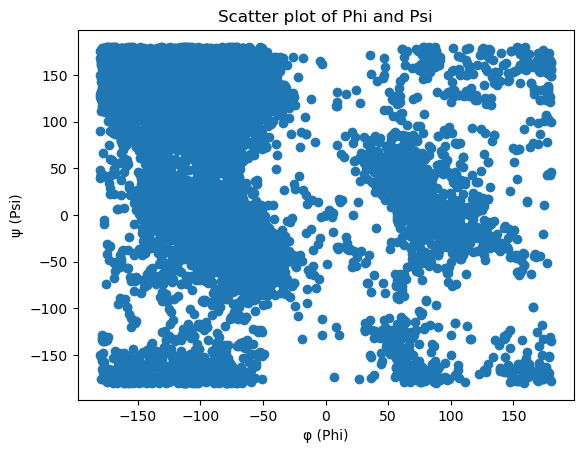

In [74]:
# Removing NaN values in Phi and Psi columns
df.dropna(subset=["phi", "psi"])

phi_values = df["phi"]
psi_values = df["psi"]

plt.scatter(phi_values, psi_values)
plt.xlabel('φ (Phi)')
plt.ylabel('ψ (Psi)')

plt.title('Scatter plot of Phi and Psi')
plt.show()

#### b) 2D histogram

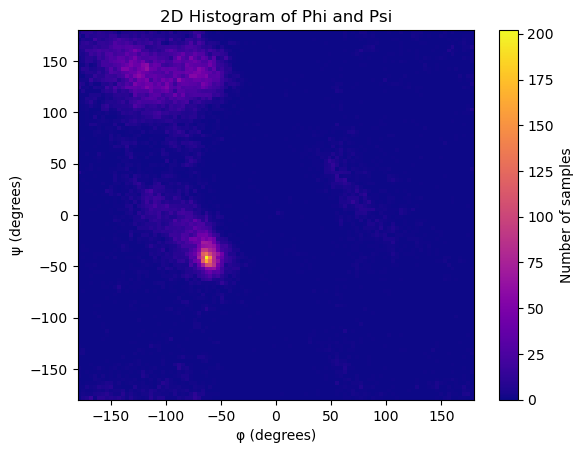

In [75]:
# 2D Histogram

plt.hist2d(phi_values, psi_values, bins=100, cmap="plasma")
plt.xlabel('φ (degrees)')
plt.ylabel('ψ (degrees)')

cb = plt.colorbar()
cb.set_label('Number of samples')

plt.title('2D Histogram of Phi and Psi')
plt.show()

#### 1c) Transform the data to better visual the Ramachandran plot

Since the data wraps around the top and bottom edge, as well as the right to left edge, we can better visualise the data if transform the data into a cylindric projection. This will unwrap the plot into a flat and rectangular plot instead.

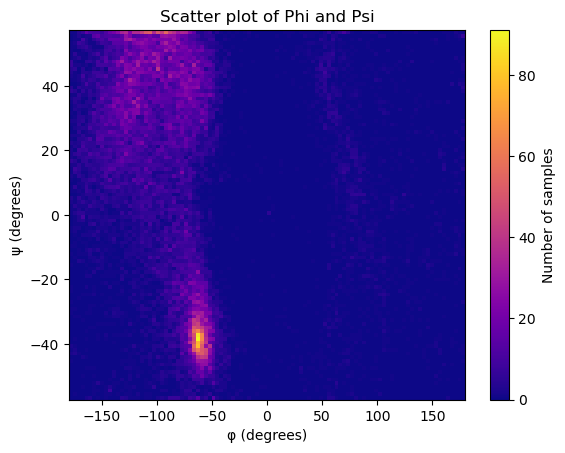

In [76]:
def transform_ramachandran(phi_list, psi_list):
    # Convert phi and psi angles to radians
    phi_list = np.deg2rad(phi_list)
    psi_list = np.deg2rad(psi_list)
   
    # Convert phi and psi angles to Cartesian coordinates
    x = np.cos(phi_list)
    y = np.sin(phi_list)
    z = np.sin(psi_list)
    
    # Project Cartesian coordinates onto cylinder
    u = np.arctan2(y, x)
    v = z
    
    return np.rad2deg(u), np.rad2deg(v)

tf_phi, tf_psi = transform_ramachandran(phi_values, psi_values)

plt.hist2d(tf_phi, tf_psi, bins=100, cmap="plasma")
plt.xlabel('φ (degrees)')
plt.ylabel('ψ (degrees)')

cb = plt.colorbar()
cb.set_label('Number of samples')

plt.title('Scatter plot of Phi and Psi')
plt.show()

## Part 2: Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

#### a) Use an appropriate method to evaluate which value of K that gives the best clustering.

Text(0.5, 0.98, 'Clustered scatterplots with k ranging 1 through 10')

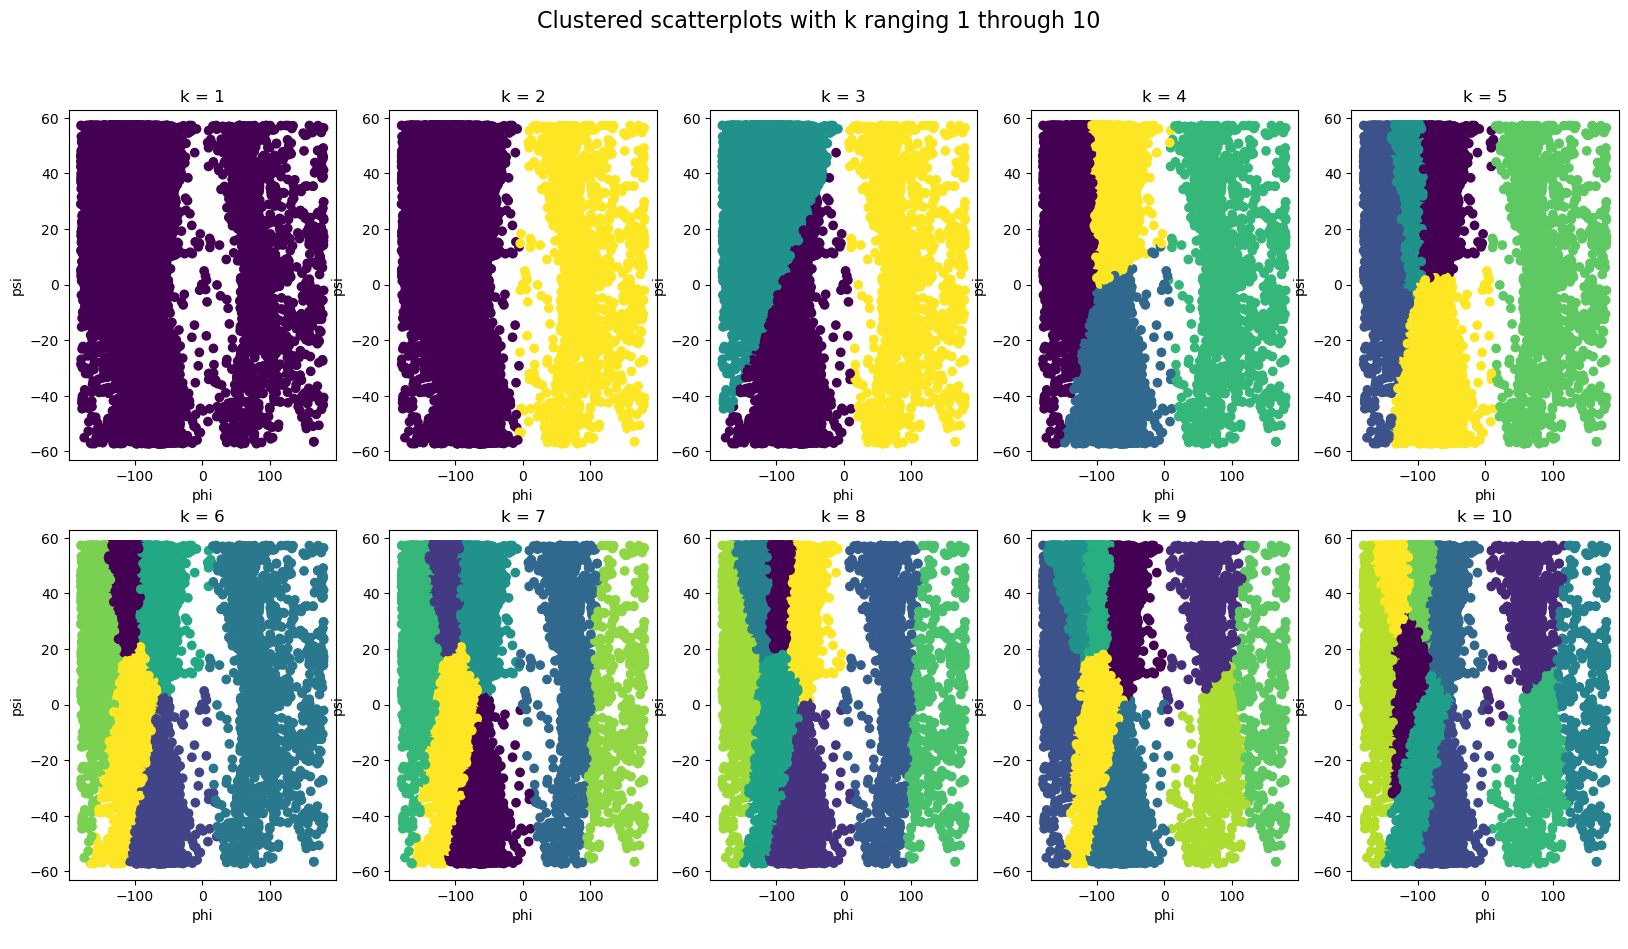

In [80]:
from sklearn.cluster import KMeans
df = pd.DataFrame({"phi": tf_phi, "psi": tf_psi})

ks = range(1, 11)
diameter = []

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

y, x = 0, 0
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df[["phi", "psi"]])

    y_pred = model.predict(df[["phi", "psi"]])
    diameter.append(model.inertia_)

    axs[y][x].scatter(x=df['phi'],y=df['psi'],c=y_pred)
    axs[y][x].set_xlabel('phi\n')
    axs[y][x].set_ylabel('psi')
    axs[y][x].set_title(f'k = {k}')

    x += 1
    if x == 5:
        y += 1
        x = 0

fig.suptitle('Clustered scatterplots with k ranging 1 through 10', fontsize=20)

When plotting the clusters, it is evident that k should be between either k=3 or k=4 as the distances between two points of the same color is small. It is difficult to determined what the optimal k is visually. Hence, we will use the Elbow method as well.

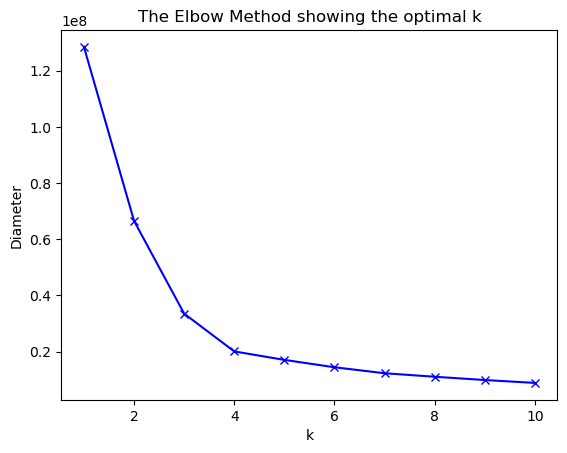

In [79]:
# Plot the elbow curve

plt.plot(ks, diameter, 'bx-')
plt.xlabel('k')
plt.ylabel('Diameter')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Answer: From the elbow curve, we can see that the elbow is at **k = 3** since the distance of the diameter makes the most decline between k=2 and k=3. From k=4 and onwards, the decline is almost stagnant.

#### b) Do the clusters found in part (a) seem reasonable?

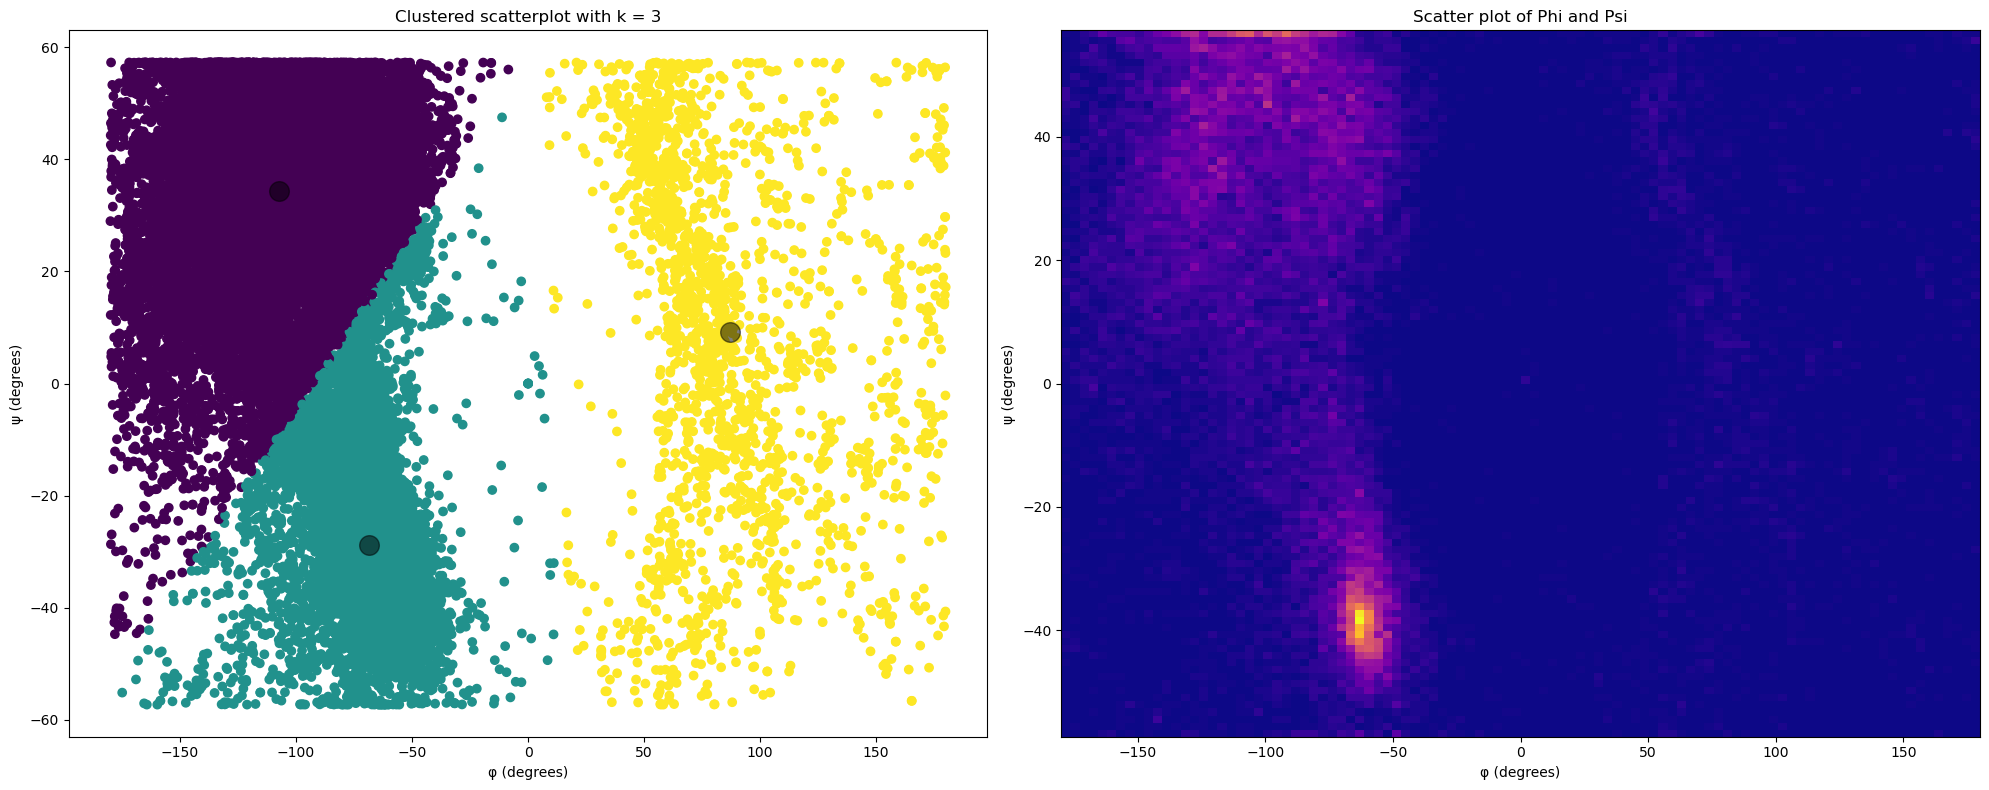

In [114]:
k = 3
model = KMeans(n_clusters=k)
model.fit(df[["phi", "psi"]])

y_pred = model.predict(df[["phi", "psi"]])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.scatter(x=df['phi'],y=df['psi'],c=y_pred)
ax1.set_xlabel('φ (degrees)')
ax1.set_ylabel('ψ (degrees)')
ax1.set_title("Clustered scatterplot with k = 3")

centers = model.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

ax2.hist2d(tf_phi, tf_psi, bins=100, cmap="plasma")
ax2.set_xlabel('φ (degrees)')
ax2.set_ylabel('ψ (degrees)')
ax2.set_title('Scatter plot of Phi and Psi')

plt.tight_layout()


Answer: The clusters recieved from using k = 3 seems reasonable, especially when you compare it the heatmap from part 1. The clusters are at simliar locations as the most intensive place on the heatmap.

## Part 3: Use the DBSCAN method to cluster the phi and psi angle combinations in the data file